**Question 5** 

How does life expectancy per region change over the years?

Importing Libraries

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing countries dataset and life expectancy dataset

In [358]:
countries_df = pd.read_csv("250 Country Data.csv")
life_expectancy_df = pd.read_csv("Life Expectancy Data.csv")

In [359]:
countries_df

,Unnamed: 0,Unnamed: 0.1,name,region,subregion,population,area
0,0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0
1,1,1,Åland Islands,Europe,Northern Europe,28875,1580.0
2,2,2,Albania,Europe,Southern Europe,2886026,28748.0
3,3,3,Algeria,Africa,Northern Africa,40400000,2381741.0
4,4,4,American Samoa,Oceania,Polynesia,57100,199.0
...,...,...,...,...,...,...,...
251,251,265,Congo (Kinshasa),Africa,Central Africa,84070000,2345000.0
252,252,266,Congo (Brazzaville),Africa,Central Africa,5244000,342000.0
253,253,267,Ivory Coast,Africa,Western Africa,25070000,322463.0
254,254,268,Syria,Asia,Western Asia,16910000,185180.0


In [360]:
life_expectancy_df

,Unnamed: 0,Country,Year,Status,HIV/AIDS Deaths,Disease,Life expectancy,Adult Mortality,Income composition of resources,Immunization coverage,GDP,Schooling
0,0,Afghanistan,2015,Developing,0.1,Hepatitis B,65.0,263.0,0.479,65.0,584.259210,10.1
1,1,Afghanistan,2014,Developing,0.1,Hepatitis B,59.9,271.0,0.476,62.0,612.696514,10.0
2,2,Afghanistan,2013,Developing,0.1,Hepatitis B,59.9,268.0,0.470,64.0,631.744976,9.9
3,3,Afghanistan,2012,Developing,0.1,Hepatitis B,59.5,272.0,0.463,67.0,669.959000,9.8
4,4,Afghanistan,2011,Developing,0.1,Hepatitis B,59.2,275.0,0.454,68.0,63.537231,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8809,8809,Zimbabwe,2004,Developing,33.6,Diphtheria,44.3,723.0,0.407,65.0,454.366654,9.2
8810,8810,Zimbabwe,2003,Developing,36.7,Diphtheria,44.5,715.0,0.418,68.0,453.351155,9.5
8811,8811,Zimbabwe,2002,Developing,39.8,Diphtheria,44.8,73.0,0.427,71.0,57.348340,10.0
8812,8812,Zimbabwe,2001,Developing,42.1,Diphtheria,45.3,686.0,0.427,75.0,548.587312,9.8


Keeping only the columns related to our question in both datasets

In [361]:
life_expectancy_df = life_expectancy_df[['Country', 'Life expectancy', 'Year']]
countries_df = countries_df[['name', 'region']]

In [362]:
life_expectancy_df

,Country,Life expectancy,Year
0,Afghanistan,65.0,2015
1,Afghanistan,59.9,2014
2,Afghanistan,59.9,2013
3,Afghanistan,59.5,2012
4,Afghanistan,59.2,2011
...,...,...,...
8809,Zimbabwe,44.3,2004
8810,Zimbabwe,44.5,2003
8811,Zimbabwe,44.8,2002
8812,Zimbabwe,45.3,2001


In [363]:
countries_df

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
251,Congo (Kinshasa),Africa
252,Congo (Brazzaville),Africa
253,Ivory Coast,Africa
254,Syria,Asia


Checking for null values in both datasets

In [364]:
print(countries_df.isnull().sum() , '\n')
print(life_expectancy_df.isnull().sum())

name      0
region    0
dtype: int64 

Country            0
Life expectancy    0
Year               0
dtype: int64


Merging the two datasets on the country using a left join

In [365]:
merged_countries_life = pd.merge(life_expectancy_df, countries_df, left_on="Country", right_on="name", how='left')

In [366]:
merged_countries_life

,Country,Life expectancy,Year,name,region
0,Afghanistan,65.0,2015,Afghanistan,Asia
1,Afghanistan,59.9,2014,Afghanistan,Asia
2,Afghanistan,59.9,2013,Afghanistan,Asia
3,Afghanistan,59.5,2012,Afghanistan,Asia
4,Afghanistan,59.2,2011,Afghanistan,Asia
...,...,...,...,...,...
8809,Zimbabwe,44.3,2004,Zimbabwe,Africa
8810,Zimbabwe,44.5,2003,Zimbabwe,Africa
8811,Zimbabwe,44.8,2002,Zimbabwe,Africa
8812,Zimbabwe,45.3,2001,Zimbabwe,Africa


Checking for null values in the merged dataset and removing the repeated column of country which is "name"

In [367]:
merged_countries_life = merged_countries_life.drop(columns = ['name'], axis = 1)
print(merged_countries_life.isnull().sum())

Country              0
Life expectancy      0
Year                 0
region             384
dtype: int64


Getting the unique regions in the dataframe

In [368]:
merged_countries_life['region'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania', nan],
      dtype=object)

Making a dataframe that contains the rows which have null values in the region from the merged dataframe and reseting index.

In [369]:
region_nulls = merged_countries_life[merged_countries_life["region"].isnull()]
region_nulls = region_nulls.reset_index()
region_nulls

,index,Country,Life expectancy,Year,region
0,2019,Czechia,78.8,2015,NaN
1,2020,Czechia,78.6,2014,NaN
2,2021,Czechia,78.2,2013,NaN
3,2022,Czechia,78.0,2012,NaN
4,2023,Czechia,77.8,2011,NaN
...,...,...,...,...,...
379,8377,United Republic of Tanzania,51.5,2004,NaN
380,8378,United Republic of Tanzania,58.0,2003,NaN
381,8379,United Republic of Tanzania,52.0,2002,NaN
382,8380,United Republic of Tanzania,49.6,2001,NaN


Getting the unique countries from the records which have nulls in region and counting the number of these countries

In [370]:
print(region_nulls['Country'].unique() , '\n')
print(len(region_nulls['Country'].unique()))

['Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Republic of Korea'
 'Republic of Moldova' 'Russian Federation'
 'The former Yugoslav republic of Macedonia' 'United Republic of Tanzania'] 

8


Replacing the null values of the region column in the merged dataframe by the correct region of the country and droping duplicate values

In [371]:
merged_countries_life.loc[merged_countries_life.Country == "Czechia", "region"] = "Europe"
merged_countries_life.loc[merged_countries_life.Country == "Republic of Moldova", "region"] = "Europe"
merged_countries_life.loc[merged_countries_life.Country == "The former Yugoslav republic of Macedonia", "region"] = "Europe"
merged_countries_life.loc[merged_countries_life.Country == "Democratic Republic of the Congo", "region"] = "Africa"
merged_countries_life.loc[merged_countries_life.Country == "United Republic of Tanzania", "region"] = "Africa"
merged_countries_life.loc[merged_countries_life.Country == "Russian Federation", "region"] = "Asia"
merged_countries_life.loc[merged_countries_life.Country == "Democratic People's Republic of Korea", "region"] = "Asia"
merged_countries_life.loc[merged_countries_life.Country == "Republic of Korea", "region"] = "Asia"

In [372]:
merged_countries_life = merged_countries_life.drop_duplicates()
merged_countries_life.reset_index(inplace = True)

In [373]:
merged_countries_life

,index,Country,Life expectancy,Year,region
0,0,Afghanistan,65.0,2015,Asia
1,1,Afghanistan,59.9,2014,Asia
2,2,Afghanistan,59.9,2013,Asia
3,3,Afghanistan,59.5,2012,Asia
4,4,Afghanistan,59.2,2011,Asia
...,...,...,...,...,...
2947,8777,Zimbabwe,44.3,2004,Africa
2948,8778,Zimbabwe,44.5,2003,Africa
2949,8779,Zimbabwe,44.8,2002,Africa
2950,8780,Zimbabwe,45.3,2001,Africa


Checking the nulls after replacing the ones in region column

In [374]:
merged_countries_life.isnull().sum()

index              0
Country            0
Life expectancy    0
Year               0
region             0
dtype: int64

Printing the number of years recorded in the dataframe

In [375]:
merged_years = merged_countries_life['Year'].unique().tolist()
merged_years.sort()
merged_years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

Getting the records for each year

In [376]:
merged_countries_life_2000 = merged_countries_life[merged_countries_life["Year"] == 2000]
merged_countries_life_2001 = merged_countries_life[merged_countries_life["Year"] == 2001]
merged_countries_life_2002 = merged_countries_life[merged_countries_life["Year"] == 2002]
merged_countries_life_2003 = merged_countries_life[merged_countries_life["Year"] == 2003]
merged_countries_life_2004 = merged_countries_life[merged_countries_life["Year"] == 2004]
merged_countries_life_2005 = merged_countries_life[merged_countries_life["Year"] == 2005]
merged_countries_life_2006 = merged_countries_life[merged_countries_life["Year"] == 2006]
merged_countries_life_2007 = merged_countries_life[merged_countries_life["Year"] == 2007]
merged_countries_life_2008 = merged_countries_life[merged_countries_life["Year"] == 2008]
merged_countries_life_2009 = merged_countries_life[merged_countries_life["Year"] == 2009]
merged_countries_life_2010 = merged_countries_life[merged_countries_life["Year"] == 2010]
merged_countries_life_2011 = merged_countries_life[merged_countries_life["Year"] == 2011]
merged_countries_life_2012 = merged_countries_life[merged_countries_life["Year"] == 2012]
merged_countries_life_2013 = merged_countries_life[merged_countries_life["Year"] == 2013]
merged_countries_life_2014 = merged_countries_life[merged_countries_life["Year"] == 2014]
merged_countries_life_2015 = merged_countries_life[merged_countries_life["Year"] == 2015]

Getting the records for Asia in all years

In [377]:
merged_countries_life_2000_asia = merged_countries_life_2000[merged_countries_life_2000["region"] == "Asia"]
merged_countries_life_2001_asia = merged_countries_life_2001[merged_countries_life_2001["region"] == "Asia"]
merged_countries_life_2002_asia = merged_countries_life_2002[merged_countries_life_2002["region"] == "Asia"]
merged_countries_life_2003_asia = merged_countries_life_2003[merged_countries_life_2003["region"] == "Asia"]
merged_countries_life_2004_asia = merged_countries_life_2004[merged_countries_life_2004["region"] == "Asia"]
merged_countries_life_2005_asia = merged_countries_life_2005[merged_countries_life_2005["region"] == "Asia"]
merged_countries_life_2006_asia = merged_countries_life_2006[merged_countries_life_2006["region"] == "Asia"]
merged_countries_life_2006_asia = merged_countries_life_2006[merged_countries_life_2006["region"] == "Asia"]
merged_countries_life_2007_asia = merged_countries_life_2007[merged_countries_life_2007["region"] == "Asia"]
merged_countries_life_2008_asia = merged_countries_life_2008[merged_countries_life_2008["region"] == "Asia"]
merged_countries_life_2009_asia = merged_countries_life_2009[merged_countries_life_2009["region"] == "Asia"]
merged_countries_life_2010_asia = merged_countries_life_2010[merged_countries_life_2010["region"] == "Asia"]
merged_countries_life_2011_asia = merged_countries_life_2011[merged_countries_life_2011["region"] == "Asia"]
merged_countries_life_2012_asia = merged_countries_life_2012[merged_countries_life_2012["region"] == "Asia"]
merged_countries_life_2013_asia = merged_countries_life_2013[merged_countries_life_2013["region"] == "Asia"]
merged_countries_life_2014_asia = merged_countries_life_2014[merged_countries_life_2014["region"] == "Asia"]
merged_countries_life_2015_asia = merged_countries_life_2015[merged_countries_life_2015["region"] == "Asia"]


Getting the mean values of each year for Asia in one array

In [378]:
merged_countries_life_asia = [merged_countries_life_2000_asia["Life expectancy"].mean(),merged_countries_life_2001_asia["Life expectancy"].mean(),merged_countries_life_2002_asia["Life expectancy"].mean(),merged_countries_life_2003_asia["Life expectancy"].mean(),merged_countries_life_2004_asia["Life expectancy"].mean(),merged_countries_life_2005_asia["Life expectancy"].mean(),merged_countries_life_2006_asia["Life expectancy"].mean(),merged_countries_life_2007_asia["Life expectancy"].mean(),merged_countries_life_2008_asia["Life expectancy"].mean(),merged_countries_life_2009_asia["Life expectancy"].mean(),merged_countries_life_2010_asia["Life expectancy"].mean(),merged_countries_life_2011_asia["Life expectancy"].mean(),merged_countries_life_2012_asia["Life expectancy"].mean(),merged_countries_life_2013_asia["Life expectancy"].mean(),merged_countries_life_2014_asia["Life expectancy"].mean(),merged_countries_life_2015_asia["Life expectancy"].mean()]

Getting the records for Europe in all years

In [379]:
merged_countries_life_2000_Europe = merged_countries_life_2000[merged_countries_life_2000["region"] == "Europe"]
merged_countries_life_2001_Europe = merged_countries_life_2001[merged_countries_life_2001["region"] == "Europe"]
merged_countries_life_2002_Europe = merged_countries_life_2002[merged_countries_life_2002["region"] == "Europe"]
merged_countries_life_2003_Europe = merged_countries_life_2003[merged_countries_life_2003["region"] == "Europe"]
merged_countries_life_2004_Europe = merged_countries_life_2004[merged_countries_life_2004["region"] == "Europe"]
merged_countries_life_2005_Europe = merged_countries_life_2005[merged_countries_life_2005["region"] == "Europe"]
merged_countries_life_2006_Europe = merged_countries_life_2006[merged_countries_life_2006["region"] == "Europe"]
merged_countries_life_2006_Europe = merged_countries_life_2006[merged_countries_life_2006["region"] == "Europe"]
merged_countries_life_2007_Europe = merged_countries_life_2007[merged_countries_life_2007["region"] == "Europe"]
merged_countries_life_2008_Europe = merged_countries_life_2008[merged_countries_life_2008["region"] == "Europe"]
merged_countries_life_2009_Europe = merged_countries_life_2009[merged_countries_life_2009["region"] == "Europe"]
merged_countries_life_2010_Europe = merged_countries_life_2010[merged_countries_life_2010["region"] == "Europe"]
merged_countries_life_2011_Europe = merged_countries_life_2011[merged_countries_life_2011["region"] == "Europe"]
merged_countries_life_2012_Europe = merged_countries_life_2012[merged_countries_life_2012["region"] == "Europe"]
merged_countries_life_2013_Europe = merged_countries_life_2013[merged_countries_life_2013["region"] == "Europe"]
merged_countries_life_2014_Europe = merged_countries_life_2014[merged_countries_life_2014["region"] == "Europe"]
merged_countries_life_2015_Europe = merged_countries_life_2015[merged_countries_life_2015["region"] == "Europe"]


Getting the mean values of each year for Europe in one array

In [380]:
merged_countries_life_Europe = [merged_countries_life_2000_Europe["Life expectancy"].mean(),merged_countries_life_2001_Europe["Life expectancy"].mean(),merged_countries_life_2002_Europe["Life expectancy"].mean(),merged_countries_life_2003_Europe["Life expectancy"].mean(),merged_countries_life_2004_Europe["Life expectancy"].mean(),merged_countries_life_2005_Europe["Life expectancy"].mean(),merged_countries_life_2006_Europe["Life expectancy"].mean(),merged_countries_life_2007_Europe["Life expectancy"].mean(),merged_countries_life_2008_Europe["Life expectancy"].mean(),merged_countries_life_2009_Europe["Life expectancy"].mean(),merged_countries_life_2010_Europe["Life expectancy"].mean(),merged_countries_life_2011_Europe["Life expectancy"].mean(),merged_countries_life_2012_Europe["Life expectancy"].mean(),merged_countries_life_2013_Europe["Life expectancy"].mean(),merged_countries_life_2014_Europe["Life expectancy"].mean(),merged_countries_life_2015_Europe["Life expectancy"].mean()]

Getting the records for Americas in all years

In [381]:
merged_countries_life_2000_Americas = merged_countries_life_2000[merged_countries_life_2000["region"] == "Americas"]
merged_countries_life_2001_Americas = merged_countries_life_2001[merged_countries_life_2001["region"] == "Americas"]
merged_countries_life_2002_Americas = merged_countries_life_2002[merged_countries_life_2002["region"] == "Americas"]
merged_countries_life_2003_Americas = merged_countries_life_2003[merged_countries_life_2003["region"] == "Americas"]
merged_countries_life_2004_Americas = merged_countries_life_2004[merged_countries_life_2004["region"] == "Americas"]
merged_countries_life_2005_Americas = merged_countries_life_2005[merged_countries_life_2005["region"] == "Americas"]
merged_countries_life_2006_Americas = merged_countries_life_2006[merged_countries_life_2006["region"] == "Americas"]
merged_countries_life_2006_Americas = merged_countries_life_2006[merged_countries_life_2006["region"] == "Americas"]
merged_countries_life_2007_Americas = merged_countries_life_2007[merged_countries_life_2007["region"] == "Americas"]
merged_countries_life_2008_Americas = merged_countries_life_2008[merged_countries_life_2008["region"] == "Americas"]
merged_countries_life_2009_Americas = merged_countries_life_2009[merged_countries_life_2009["region"] == "Americas"]
merged_countries_life_2010_Americas = merged_countries_life_2010[merged_countries_life_2010["region"] == "Americas"]
merged_countries_life_2011_Americas = merged_countries_life_2011[merged_countries_life_2011["region"] == "Americas"]
merged_countries_life_2012_Americas = merged_countries_life_2012[merged_countries_life_2012["region"] == "Americas"]
merged_countries_life_2013_Americas = merged_countries_life_2013[merged_countries_life_2013["region"] == "Americas"]
merged_countries_life_2014_Americas = merged_countries_life_2014[merged_countries_life_2014["region"] == "Americas"]
merged_countries_life_2015_Americas = merged_countries_life_2015[merged_countries_life_2015["region"] == "Americas"]


Getting the mean values of each year for Americas in one array

In [382]:
merged_countries_life_Americas = [merged_countries_life_2000_Americas["Life expectancy"].mean(),merged_countries_life_2001_Americas["Life expectancy"].mean(),merged_countries_life_2002_Americas["Life expectancy"].mean(),merged_countries_life_2003_Americas["Life expectancy"].mean(),merged_countries_life_2004_Americas["Life expectancy"].mean(),merged_countries_life_2005_Americas["Life expectancy"].mean(),merged_countries_life_2006_Americas["Life expectancy"].mean(),merged_countries_life_2007_Americas["Life expectancy"].mean(),merged_countries_life_2008_Americas["Life expectancy"].mean(),merged_countries_life_2009_Americas["Life expectancy"].mean(),merged_countries_life_2010_Americas["Life expectancy"].mean(),merged_countries_life_2011_Americas["Life expectancy"].mean(),merged_countries_life_2012_Americas["Life expectancy"].mean(),merged_countries_life_2013_Americas["Life expectancy"].mean(),merged_countries_life_2014_Americas["Life expectancy"].mean(),merged_countries_life_2015_Americas["Life expectancy"].mean()]

Getting the records for Africa in all years

In [383]:
merged_countries_life_2000_Africa = merged_countries_life_2000[merged_countries_life_2000["region"] == "Africa"]
merged_countries_life_2001_Africa = merged_countries_life_2001[merged_countries_life_2001["region"] == "Africa"]
merged_countries_life_2002_Africa = merged_countries_life_2002[merged_countries_life_2002["region"] == "Africa"]
merged_countries_life_2003_Africa = merged_countries_life_2003[merged_countries_life_2003["region"] == "Africa"]
merged_countries_life_2004_Africa = merged_countries_life_2004[merged_countries_life_2004["region"] == "Africa"]
merged_countries_life_2005_Africa = merged_countries_life_2005[merged_countries_life_2005["region"] == "Africa"]
merged_countries_life_2006_Africa = merged_countries_life_2006[merged_countries_life_2006["region"] == "Africa"]
merged_countries_life_2006_Africa = merged_countries_life_2006[merged_countries_life_2006["region"] == "Africa"]
merged_countries_life_2007_Africa = merged_countries_life_2007[merged_countries_life_2007["region"] == "Africa"]
merged_countries_life_2008_Africa = merged_countries_life_2008[merged_countries_life_2008["region"] == "Africa"]
merged_countries_life_2009_Africa = merged_countries_life_2009[merged_countries_life_2009["region"] == "Africa"]
merged_countries_life_2010_Africa = merged_countries_life_2010[merged_countries_life_2010["region"] == "Africa"]
merged_countries_life_2011_Africa = merged_countries_life_2011[merged_countries_life_2011["region"] == "Africa"]
merged_countries_life_2012_Africa = merged_countries_life_2012[merged_countries_life_2012["region"] == "Africa"]
merged_countries_life_2013_Africa = merged_countries_life_2013[merged_countries_life_2013["region"] == "Africa"]
merged_countries_life_2014_Africa = merged_countries_life_2014[merged_countries_life_2014["region"] == "Africa"]
merged_countries_life_2015_Africa = merged_countries_life_2015[merged_countries_life_2015["region"] == "Africa"]


Getting the mean values of each year for Africa in one array

In [384]:
merged_countries_life_Africa = [merged_countries_life_2000_Africa["Life expectancy"].mean(),merged_countries_life_2001_Africa["Life expectancy"].mean(),merged_countries_life_2002_Africa["Life expectancy"].mean(),merged_countries_life_2003_Africa["Life expectancy"].mean(),merged_countries_life_2004_Africa["Life expectancy"].mean(),merged_countries_life_2005_Africa["Life expectancy"].mean(),merged_countries_life_2006_Africa["Life expectancy"].mean(),merged_countries_life_2007_Africa["Life expectancy"].mean(),merged_countries_life_2008_Africa["Life expectancy"].mean(),merged_countries_life_2009_Africa["Life expectancy"].mean(),merged_countries_life_2010_Africa["Life expectancy"].mean(),merged_countries_life_2011_Africa["Life expectancy"].mean(),merged_countries_life_2012_Africa["Life expectancy"].mean(),merged_countries_life_2013_Africa["Life expectancy"].mean(),merged_countries_life_2014_Africa["Life expectancy"].mean(),merged_countries_life_2015_Africa["Life expectancy"].mean()]

Getting the records for Oceania in all years

In [385]:
merged_countries_life_2000_Oceania = merged_countries_life_2000[merged_countries_life_2000["region"] == "Oceania"]
merged_countries_life_2001_Oceania = merged_countries_life_2001[merged_countries_life_2001["region"] == "Oceania"]
merged_countries_life_2002_Oceania = merged_countries_life_2002[merged_countries_life_2002["region"] == "Oceania"]
merged_countries_life_2003_Oceania = merged_countries_life_2003[merged_countries_life_2003["region"] == "Oceania"]
merged_countries_life_2004_Oceania = merged_countries_life_2004[merged_countries_life_2004["region"] == "Oceania"]
merged_countries_life_2005_Oceania = merged_countries_life_2005[merged_countries_life_2005["region"] == "Oceania"]
merged_countries_life_2006_Oceania = merged_countries_life_2006[merged_countries_life_2006["region"] == "Oceania"]
merged_countries_life_2006_Oceania = merged_countries_life_2006[merged_countries_life_2006["region"] == "Oceania"]
merged_countries_life_2007_Oceania = merged_countries_life_2007[merged_countries_life_2007["region"] == "Oceania"]
merged_countries_life_2008_Oceania = merged_countries_life_2008[merged_countries_life_2008["region"] == "Oceania"]
merged_countries_life_2009_Oceania = merged_countries_life_2009[merged_countries_life_2009["region"] == "Oceania"]
merged_countries_life_2010_Oceania = merged_countries_life_2010[merged_countries_life_2010["region"] == "Oceania"]
merged_countries_life_2011_Oceania = merged_countries_life_2011[merged_countries_life_2011["region"] == "Oceania"]
merged_countries_life_2012_Oceania = merged_countries_life_2012[merged_countries_life_2012["region"] == "Oceania"]
merged_countries_life_2013_Oceania = merged_countries_life_2013[merged_countries_life_2013["region"] == "Oceania"]
merged_countries_life_2014_Oceania = merged_countries_life_2014[merged_countries_life_2014["region"] == "Oceania"]
merged_countries_life_2015_Oceania = merged_countries_life_2015[merged_countries_life_2015["region"] == "Oceania"]


Getting the mean values of each year for Oceania in one array

In [386]:
merged_countries_life_Oceania = [merged_countries_life_2000_Oceania["Life expectancy"].mean(),merged_countries_life_2001_Oceania["Life expectancy"].mean(),merged_countries_life_2002_Oceania["Life expectancy"].mean(),merged_countries_life_2003_Oceania["Life expectancy"].mean(),merged_countries_life_2004_Oceania["Life expectancy"].mean(),merged_countries_life_2005_Oceania["Life expectancy"].mean(),merged_countries_life_2006_Oceania["Life expectancy"].mean(),merged_countries_life_2007_Oceania["Life expectancy"].mean(),merged_countries_life_2008_Oceania["Life expectancy"].mean(),merged_countries_life_2009_Oceania["Life expectancy"].mean(),merged_countries_life_2010_Oceania["Life expectancy"].mean(),merged_countries_life_2011_Oceania["Life expectancy"].mean(),merged_countries_life_2012_Oceania["Life expectancy"].mean(),merged_countries_life_2013_Oceania["Life expectancy"].mean(),merged_countries_life_2014_Oceania["Life expectancy"].mean(),merged_countries_life_2015_Oceania["Life expectancy"].mean()]

Plotting rate of change of life expectancy of each region throughout the years

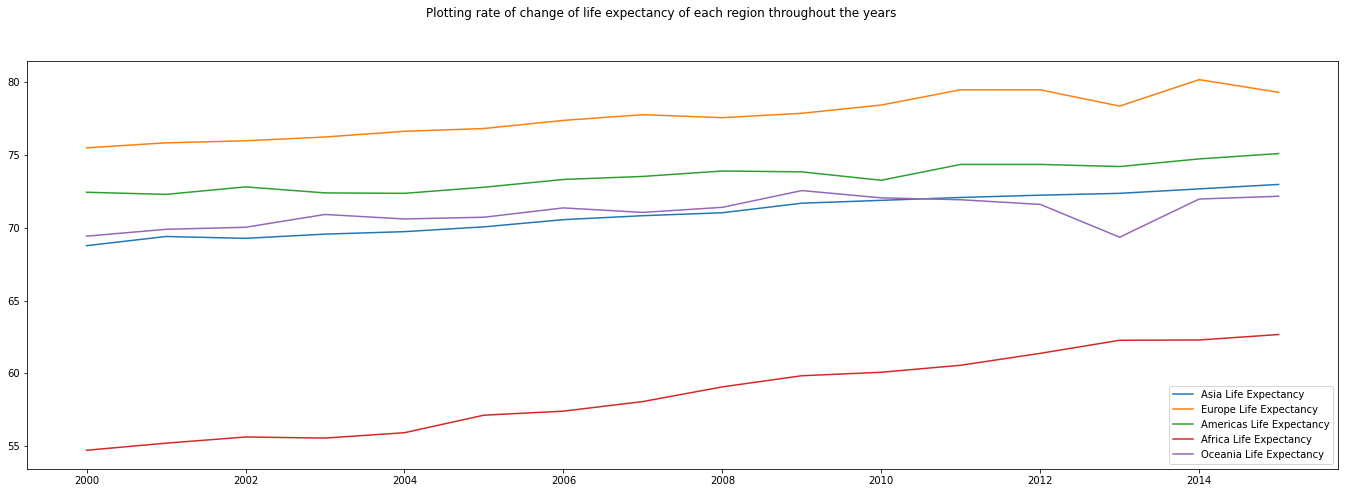

In [395]:
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(23.5, 7.5)
ax1.plot(merged_years, merged_countries_life_asia, label ="Asia Life Expectancy")
ax1.plot(merged_years, merged_countries_life_Europe, label ="Europe Life Expectancy")
ax1.plot(merged_years, merged_countries_life_Americas, label ="Americas Life Expectancy")
ax1.plot(merged_years, merged_countries_life_Africa, label ="Africa Life Expectancy")
ax1.plot(merged_years, merged_countries_life_Oceania, label ="Oceania Life Expectancy")
fig.suptitle('Plotting rate of change of life expectancy of each region throughout the years')
leg = ax1.legend()


In conclusion, we found out that the life expectancy overall in all regions has been increasing since 2000 and that's due to the many breakthroughs that happened in the medical area and any progress that happens in any area traverses in the other regions. But there are insights that life expectancy in europe and oceania took a surprising negative inclination in 2012 and that was pretty interesting and calls for investigation on what happened that year but after that it started to increase again in both of these regions yet again in 2014 it took another negative inclination but this time in europe alone which is more interesting to find what happened in europe generally in that interval starting 2012.

Regarding the differences between each region in life expectancy, we found out that the region with the highest values in life expectancy is europe which is pretty convincing due to the high medical capabilities that europe have. Then comes the americas region which is also convincing cause the americas contain the United States of America and Canada and many countries that have high medical capabilities. After that comes Asia and Oceanina which have similar values that are less than the americas and europe but obviously are considered high ones compared to Africa which has the least life expectancy values in all regions and these values are very low due to famines that occur in many countries in africa and due to the lack of medical capabilities represented in hospitals, medicines and doctors.